# Analysis of the AIDA Dataset

## !!! This requires access to the AIDA dataset to run !!!

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
aida = pd.read_csv('quake_data/aida_crateri.csv',encoding='utf-8')
aida = aida[aida['ATECO 2007 codice'].notna()]
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].astype(int).astype('string')
m = aida['ATECO 2007 codice'].str.len().max()
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].str.rjust(m, '0')
aida['ateco2'] = aida['ATECO 2007 codice'].astype('str').str[0:2]
aida = aida[['Comune','Cratere Centro Italia 2016','Sede operativa - Comune','Anno di costituzione','Chiusura bilancio Ultimo anno disp.','Ricavi delle vendite migl EUR Ultimo anno disp.','Dipendenti Ultimo anno disp.','Stato giuridico','ateco2']]
#aida.columns = ['Comune','ricavi','dipendenti','stato','ateco2']
#aida['survive'] = np.where(aida['stato']=='Attiva', 1, 0)
#aida[aida['ateco2']=='02'] #check ateco A

C:\Users\Marco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
# Sistemiamo la sede operativa

d = [['D\'','d\''],['Di ','di '],['Delle ','delle '],['Degli ','degli '],['Della ','della '],['Del ','del '],['De\'','de\''],['Dell\'','dell\''],
     ['A ','a '],['Al ','al '],['Alla ','alla '],['All\'','all\''],
     ['Da ','da '],
     ['In ','in '],['Nel ','nel '],['Ne\'','ne\''],
     ['E ','e '],
     ['Sul ','sul '],['Sulla ','sulla '],
     ['Citta\'','Città'],['Abruzzo Citer','Abruzzo Citeriore'],['Sassocorvaro Auditore','Sassocorvaro']]
def convert(x):
    x = x.title()
    for f,t in d:
        x = x.replace(f,t)
    return x
    
aida['ComuneOP'] = aida['Sede operativa - Comune'].astype('str').apply(convert)
aida.loc[aida['ComuneOP']=='Nan','ComuneOP'] = aida.loc[aida['ComuneOP']=='Nan','Comune']
print('comuni con Comune e Coune OP diversi:')
print(aida.loc[aida['ComuneOP']!=aida['Comune'],['ComuneOP','Comune']].shape[0]/aida.shape[0]*100,'%')
aida = aida.drop('Sede operativa - Comune',axis=1)

comuni con Comune e Coune OP diversi:
1.1109432281767648 %


In [18]:
# elimino dati incompleti
pre = aida.shape[0]
#print('previous number of rows',pre)
aida = aida[aida['Ricavi delle vendite migl EUR Ultimo anno disp.']!='n.d.']
aida = aida[aida['Dipendenti Ultimo anno disp.']!='n.d.']
aida = aida[aida['Anno di costituzione'].notna()]
aida = aida[aida['Chiusura bilancio Ultimo anno disp.'].notna()]
curr = aida.shape[0]
print('remved',abs(curr-pre)/pre*100,'% entries')

remved 13.044238920389029 % entries


In [19]:
aida['costituzione'] = aida['Anno di costituzione'].apply(lambda d: int(d.split('/')[-1]))
aida['ubilancio'] = aida['Chiusura bilancio Ultimo anno disp.'].apply(lambda d: int(d.split('-')[0])) 
aida = aida.drop(['Anno di costituzione','Chiusura bilancio Ultimo anno disp.'],axis=1)
aida.head(3)
aida.to_csv('quake_data/aida_raw.csv',index=False)

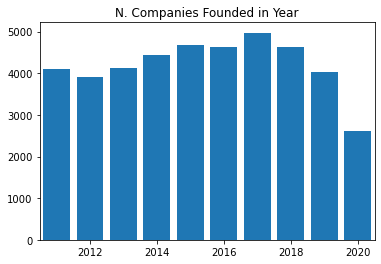

In [6]:
costituzioni = aida['costituzione'].value_counts().to_frame().reset_index().sort_values(['index'], ascending=False)
costituzioni.columns = ['anno','n']
plt.bar(costituzioni['anno'],costituzioni['n'])
plt.xlim([2010.5,2020.5])
plt.title('N. Companies Founded in Year')
plt.show()

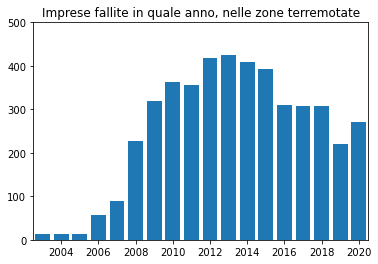

In [7]:
imprese_pre_terremoto_fallite = aida[(aida['costituzione'] < 2015)&(aida['Stato giuridico']!='Attiva')& (aida['Cratere Centro Italia 2016']==1)]
ubilancio = imprese_pre_terremoto_fallite['ubilancio'].value_counts().to_frame().reset_index().sort_values(['index'], ascending=False)
ubilancio.columns = ['anno','n']
plt.bar(ubilancio['anno']+1,ubilancio['n'])
plt.xlim([2002.5,2020.5])
plt.ylim([0,500])
plt.title('Imprese fallite in quale anno, nelle zone terremotate')
plt.show()

In [14]:
imprese_pre_terremoto_fallite.loc[imprese_pre_terremoto_fallite['Comune']=='Accumoli',:]
imprese_pre_terremoto_fallite.to_csv('quake_data/failed_raw.csv',index=False)

In [8]:
imprese_pre_terremoto = aida[(aida['costituzione'] < 2015) & (aida['ubilancio'] >= 2015)]
imprese_post_terremoto = aida[aida['costituzione'] >= 2017]
imprese_fallite_nel_2017 = aida[(aida['ubilancio'].isin([2016,2017])) & (aida['Stato giuridico'] != 'Attiva')]
imprese_sopravvissute = imprese_pre_terremoto[imprese_pre_terremoto['ubilancio'] > 2017]
print('imprese create pre terremoto',imprese_pre_terremoto.shape[0])
print('imprese create post terremoto',imprese_post_terremoto.shape[0])
print('imprese_fallite_nel_2017',imprese_fallite_nel_2017.shape[0])
print('imprese_sopravvissute',imprese_sopravvissute.shape[0])

imprese create pre terremoto 53289
imprese create post terremoto 16245
imprese_fallite_nel_2017 5223
imprese_sopravvissute 43234


In [9]:
imprese_pre_terremoto[imprese_pre_terremoto['ateco2']=='02']

,Comune,Cratere Centro Italia 2016,Ricavi delle vendite migl EUR Ultimo anno disp.,Dipendenti Ultimo anno disp.,Stato giuridico,ateco2,ComuneOP,costituzione,ubilancio
191,Fabriano,1.0,2010.0,3,Attiva,02,Fabriano,1992,2020
325,Fabriano,1.0,601.0,0,Attiva,02,Fabriano,2009,2021
343,Fabriano,1.0,537.0,42,Fallita,02,Fabriano,1983,2017
475,Fabriano,1.0,250.0,30,Cessata (Fusione),02,Fabriano,2002,2017
898,Fabriano,1.0,1,2,Attiva,02,Fabriano,2010,2020
...,...,...,...,...,...,...,...,...,...
124714,Fara in Sabina,0.0,160.0,3,Attiva,02,Fara in Sabina,2001,2020
125367,Caramanico Terme,0.0,136,1,Attiva,02,Caramanico Terme,2008,2020
125806,Magliano de' Marsi,0.0,132,5,Attiva,02,Magliano de' Marsi,1997,2020
126420,Massa d'Albe,0.0,0,0,Attiva,02,Massa d'Albe,1992,2020


In [10]:
aida_t = imprese_pre_terremoto.copy()

def f_survived(b):
    if b > 2017:
        return 1
    else:
        return 0
aida_t['survived'] = aida_t['ubilancio'].apply(f_survived)

aida_t.to_csv('quake_data/aida_crateri3.csv',index=False)

## aida_crateri3.csv


These are companies founded before the earthquale that were active when the earthquake hit

imprese_pre_terremoto = aida[(aida['costituzione'] < 2015) & (aida['ubilancio'] >= 2015)]

survuved fiels allow to establish if they survived the earthquake of not

# Analysis of companies Creation During the Years

In [11]:
aida

,Comune,Cratere Centro Italia 2016,Ricavi delle vendite migl EUR Ultimo anno disp.,Dipendenti Ultimo anno disp.,Stato giuridico,ateco2,ComuneOP,costituzione,ubilancio
0,Cerreto d'Esi,1.0,73297.0,292,Attiva,28,Cerreto d'Esi,1980,2020
1,Cerreto d'Esi,1.0,21872.0,179,Cessata (Fusione),27,Cerreto d'Esi,1995,2017
2,Cerreto d'Esi,1.0,21804.0,158,Fallita,31,Cerreto d'Esi,1988,2013
3,Cerreto d'Esi,1.0,16484.0,25,Cessata (Fusione),46,Cerreto d'Esi,1996,2009
4,Cerreto d'Esi,1.0,14400.0,86,Fallita,17,Cerreto d'Esi,1972,2004
...,...,...,...,...,...,...,...,...,...
126715,Celano,0.0,0,0,Cessata (In liquidazione),01,Celano,1995,2007
126716,Celano,0.0,0,0,In liquidazione,72,Celano,1994,2011
126717,Celano,0.0,0,0,Attiva,47,Celano,1989,2011
126718,Celano,0.0,0,0,Attiva,82,Celano,1985,2020


In [12]:
ateco2007 = pd.read_csv('quake_data/Ateco2007.csv', sep=';')
ateco1 = ateco2007[ateco2007['Codice Ateco 2007'].str.len()==1].reset_index().drop(['index','Codice Ateco 2007'],axis=1)
ateco1.columns = ['ateco1','desc1']
ateco2 = ateco2007[ateco2007['Codice Ateco 2007'].str.len()==2].reset_index().drop('index',axis=1)
ateco2.columns = ['ateco1','ateco2','desc2']
ateco = pd.merge(ateco1,ateco2)
ateco

,ateco1,desc1,ateco2,desc2
0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",01,COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",02,SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
2,A,"AGRICOLTURA, SILVICOLTURA E PESCA",03,PESCA E ACQUACOLTURA
3,B,ESTRAZIONE DI MINERALI DA CAVE E MINIERE,05,ESTRAZIONE DI CARBONE (ESCLUSA TORBA)
4,B,ESTRAZIONE DI MINERALI DA CAVE E MINIERE,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
...,...,...,...,...
83,S,ALTRE ATTIVITÀ DI SERVIZI,95,RIPARAZIONE DI COMPUTER E DI BENI PER USO PERS...
84,S,ALTRE ATTIVITÀ DI SERVIZI,96,ALTRE ATTIVITÀ DI SERVIZI PER LA PERSONA
85,T,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
86,T,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,98,PRODUZIONE DI BENI E SERVIZI INDIFFERENZIATI P...


In [13]:
aida_ateco = pd.merge(aida , ateco, on='ateco2')
aida_ateco

,Comune,Cratere Centro Italia 2016,Ricavi delle vendite migl EUR Ultimo anno disp.,Dipendenti Ultimo anno disp.,Stato giuridico,ateco2,ComuneOP,costituzione,ubilancio,ateco1,desc1,desc2
0,Cerreto d'Esi,1.0,73297.0,292,Attiva,28,Cerreto d'Esi,1980,2020,C,ATTIVITÀ MANIFATTURIERE,FABBRICAZIONE DI MACCHINARI ED APPARECCHIATURE...
1,Cerreto d'Esi,1.0,31,13,Cessata (In liquidazione),28,Cerreto d'Esi,2007,2008,C,ATTIVITÀ MANIFATTURIERE,FABBRICAZIONE DI MACCHINARI ED APPARECCHIATURE...
2,Fabriano,1.0,165156.0,406,Attiva,28,Fabriano,2000,2020,C,ATTIVITÀ MANIFATTURIERE,FABBRICAZIONE DI MACCHINARI ED APPARECCHIATURE...
3,Fabriano,1.0,43980.0,98,Attiva,28,Resana,1989,2020,C,ATTIVITÀ MANIFATTURIERE,FABBRICAZIONE DI MACCHINARI ED APPARECCHIATURE...
4,Fabriano,1.0,7517.0,46,Attiva,28,Fabriano,1990,2020,C,ATTIVITÀ MANIFATTURIERE,FABBRICAZIONE DI MACCHINARI ED APPARECCHIATURE...
...,...,...,...,...,...,...,...,...,...,...,...,...
109338,Monte Castello di Vibio,0.0,119,1,In liquidazione,12,Monte Castello di Vibio,1970,2019,C,ATTIVITÀ MANIFATTURIERE,INDUSTRIA DEL TABACCO
109339,Loreto Aprutino,0.0,0,0,Cessata (In liquidazione),12,Loreto Aprutino,1998,2009,C,ATTIVITÀ MANIFATTURIERE,INDUSTRIA DEL TABACCO
109340,Chieti,0.0,0,0,Attiva,12,Chieti,1989,2008,C,ATTIVITÀ MANIFATTURIERE,INDUSTRIA DEL TABACCO
109341,Chieti,0.0,0,0,In liquidazione,12,Chieti,1962,2020,C,ATTIVITÀ MANIFATTURIERE,INDUSTRIA DEL TABACCO


In [14]:
aida_ateco[aida_ateco['Cratere Centro Italia 2016']==1]['desc1'].unique()

array(['ATTIVITÀ MANIFATTURIERE',
       "COMMERCIO ALL'INGROSSO E AL DETTAGLIO; RIPARAZIONE DI AUTOVEICOLI E MOTOCICLI",
       'TRASPORTO E MAGAZZINAGGIO', 'COSTRUZIONI',
       "ATTIVITA' IMMOBILIARI", 'SERVIZI DI INFORMAZIONE E COMUNICAZIONE',
       'ATTIVITÀ PROFESSIONALI, SCIENTIFICHE E TECNICHE',
       "SANITA' E ASSISTENZA SOCIALE",
       'ATTIVITÀ DEI SERVIZI DI ALLOGGIO E DI RISTORAZIONE',
       'NOLEGGIO, AGENZIE DI VIAGGIO, SERVIZI DI SUPPORTO ALLE IMPRESE',
       'FORNITURA DI ACQUA; RETI FOGNARIE, ATTIVITÀ DI GESTIONE DEI RIFIUTI E RISANAMENTO',
       'AGRICOLTURA, SILVICOLTURA E PESCA', 'ISTRUZIONE',
       'ATTIVITÀ FINANZIARIE E ASSICURATIVE',
       'FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ARIA CONDIZIONATA',
       'ESTRAZIONE DI MINERALI DA CAVE E MINIERE',
       'ATTIVITÀ ARTISTICHE, SPORTIVE, DI INTRATTENIMENTO E DIVERTIMENTO',
       'AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIONE SOCIALE OBBLIGATORIA',
       'ORGANIZZAZIONI ED ORGANISMI EXTRATERR

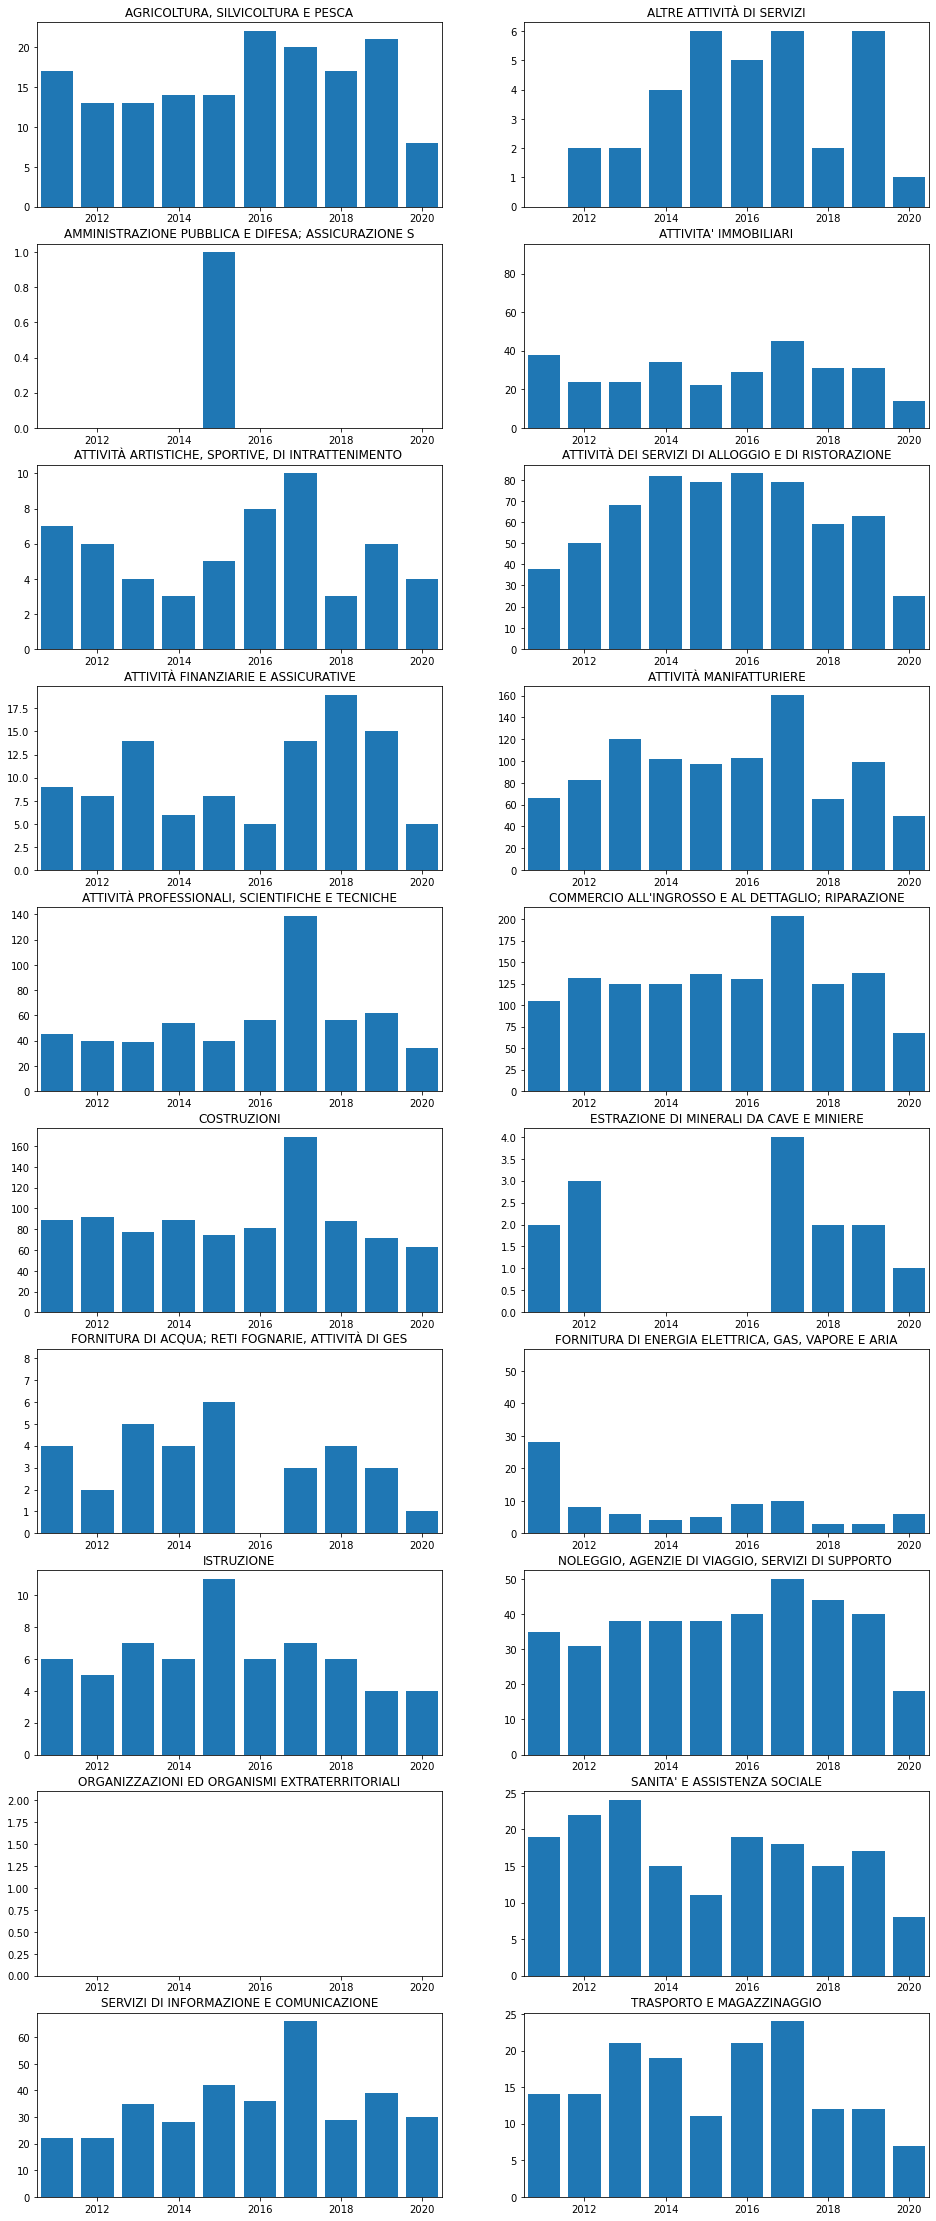

In [15]:
letters = sorted(aida_ateco[aida_ateco['Cratere Centro Italia 2016']==1]['desc1'].unique())
fig = plt.figure(figsize=(16,40))
for i in range(len(letters)):
    plt.subplot(math.ceil(len(letters)/2),2,i+1)
    df = aida_ateco[(aida_ateco['Cratere Centro Italia 2016']==1)&(aida_ateco['desc1']==letters[i])]
    costituzioni = df['costituzione'].value_counts().to_frame().reset_index().sort_values(['index'], ascending=False)
    costituzioni.columns = ['anno','n']
    plt.bar(costituzioni['anno'],costituzioni['n'])
    plt.xlim([2010.5,2020.5])
    plt.title(letters[i][:50])
    #plt.xlabel('year of foundation')
    #plt.ylabel('n. companies')
plt.show()